<a href="https://colab.research.google.com/github/Savoxism/Mathematical-Algorithms/blob/main/rolling_dices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First Exercise: greater than 5 prob

In [2]:
# You can use this cell for your calculations (not graded)

# This list represents each dice side
dice = [1,2,3,4,5,6]

# The idea is to randomly choose one element from this list three times and sum them.
# Each time we choose, it is as if we had thrown a dice and the side is the chosen number.
# This list will store the sum for each iteration. The idea is to repeat this experiment several times.
sum_results = []

number_iterations = 1000

# Setting a random seed just for reproducibility
np.random.seed(42)
# It will play this game number_iteration times
for i in range(number_iterations):
    # Throw the first dice
    throw_1 = np.random.choice(dice)
    # Throw the second dice
    throw_2 = np.random.choice(dice)
    # Sum the result
    sum_throw = throw_1 + throw_2
    # Append to the sum_result list
    sum_results.append(sum_throw)

# After recording all the sums, the actual probability will be very close to the proportion among every sum greater than 10 in the sum_results list.
greater_5_count = 0

for x in sum_results:
    if x > 5:
        greater_5_count += 1

probability = greater_5_count/len(sum_results)
print(f"The probability by this simulation is: {probability}")

The probability by this simulation is: 0.719


Exercise 2: Compute the mean and variance of a fair dice

In [3]:
n_rolls = 20000

rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.50
variance of rolls: 2.92


Exercise 4: 4-sided fair dice

In [28]:
n_sides = 4
dice = np.array([i for i in range(1, n_sides+1)])
dice

array([1, 2, 3, 4])

In [30]:
n_sides = 4
n_rolls = 20000  # example number of rolls
dice = np.array([i for i in range(1, n_sides + 1)])

first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

sum_rolls = first_rolls + second_rolls

prob_2 = sum_rolls[sum_rolls == 2].size / n_rolls
prob_8 = sum_rolls[sum_rolls == 8].size / n_rolls
prob_2_or_8 = prob_2 + prob_8
print(prob_2_or_8)

prob_3 = sum_rolls[sum_rolls == 3].size / n_rolls
prob_7 = sum_rolls[sum_rolls == 7].size / n_rolls
prob_3_or_7 = prob_3 + prob_7
print(prob_3_or_7)

prob_4 = sum_rolls[sum_rolls == 4].size / n_rolls
prob_6 = sum_rolls[sum_rolls == 6].size / n_rolls
prob_4_or_6 = prob_4 + prob_6
print(prob_4_or_6)

prob_5 = sum_rolls[sum_rolls == 5].size / n_rolls
prob_5_or_5 = prob_5 + prob_5
print(prob_5_or_5)

0.12195
0.2489
0.37515
0.508


Exercise 4: Compute the mean and the variance of the sums


In [6]:
mean = np.mean([prob_2_or_8, prob_3_or_7, prob_4_or_6, prob_5_or_5])
mean

0.31329999999999997

In [7]:
variance = np.var([prob_2_or_8, prob_3_or_7, prob_4_or_6, prob_5_or_5])
variance

0.019786811249999998

In [8]:
covariance = np.cov([prob_2_or_8, prob_3_or_7, prob_4_or_6, prob_5_or_5])
covariance

array(0.02638241)

Exercise 5: Loaded 4-sided dice

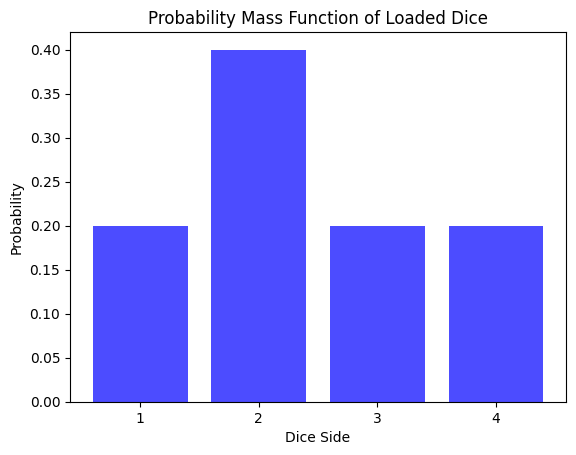

In [14]:
def load_dice(n_sides, loaded_number):
    # All probabilities are initially the same
    probs = np.array([1/(n_sides + 1) for _ in range(n_sides)])

    # Adjust the probability of the loaded side
    loaded_prob = 2 / (n_sides + 1)
    other_prob = (1 - loaded_prob) / (n_sides - 1)

    # Assign the probabilities
    probs.fill(other_prob)
    probs[loaded_number - 1] = loaded_prob

    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return

    return probs

# Get probabilities if dice is loaded towards side 2
n_sides = 4
dice = np.array([i for i in range(1, n_sides + 1)])
probs_loaded_dice_4 = load_dice(n_sides, loaded_number=2)

# print(f"Probabilities for loaded dice: {probs_loaded_dice_4}")

plt.bar(range(1, n_sides + 1), probs_loaded_dice_4, color='blue', alpha=0.7)
plt.xlabel('Dice Side')
plt.ylabel('Probability')
plt.title('Probability Mass Function of Loaded Dice')
plt.xticks(range(1, n_sides + 1))
plt.show()

In [15]:
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

sum_rolls = first_rolls + second_rolls

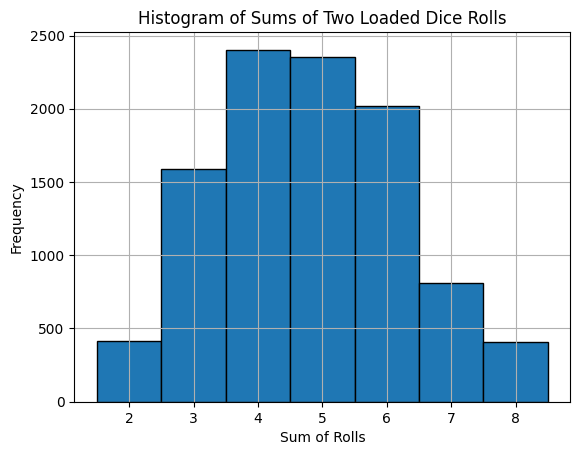

In [18]:
n_sides = 4
loaded_number = 2
n_rolls = 10000  # You can change this to the desired number of rolls
probs_loaded_dice = load_dice(n_sides, loaded_number)

# Dice sides
dice = np.arange(1, n_sides + 1)

# Roll the loaded dice
first_rolls = np.random.choice(dice, size=n_rolls, p=probs_loaded_dice)
second_rolls = np.random.choice(dice, size=n_rolls, p=probs_loaded_dice)
sum_rolls = first_rolls + second_rolls

plt.hist(sum_rolls, bins=range(2, 2*n_sides + 2), edgecolor='black', align='left')
plt.title('Histogram of Sums of Two Loaded Dice Rolls')
plt.xlabel('Sum of Rolls')
plt.ylabel('Frequency')
plt.xticks(range(2, 2*n_sides + 1))
plt.grid(True)
plt.show()


EXERCISE 6: loaded 6-sided dice


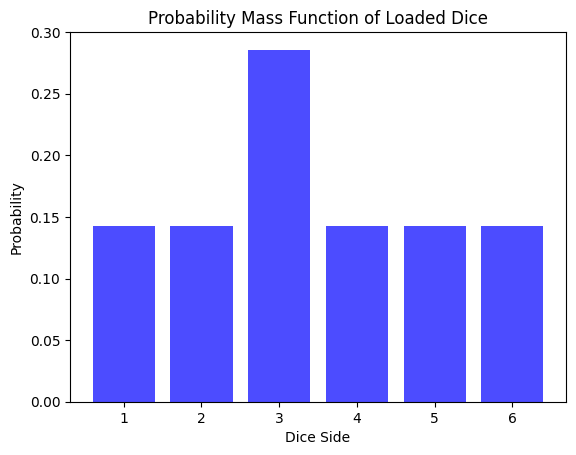

In [22]:
# Get probabilities if dice is loaded towards side 2
n_sides = 6
dice = np.array([i for i in range(1, n_sides + 1)])
probs_loaded_dice_6 = load_dice(n_sides, loaded_number=3)

plt.bar(range(1, n_sides + 1), probs_loaded_dice_6, color='blue', alpha=0.7)
plt.xlabel('Dice Side')
plt.ylabel('Probability')
plt.title('Probability Mass Function of Loaded Dice')
plt.xticks(range(1, n_sides + 1))
plt.show()

Exercise 7: dependant 6-sided fair dice

mean of first_rolls: 3.52
variance of first_rolls: 2.92

mean of second_rolls: 2.34
variance of second_rolls: 4.67

mean of sum_of_rolls: 5.86
variance of sum_of_rolls: 12.23

covariance between first and second roll:
[[2.92234336 2.32022437]
 [2.32022437 4.66738341]]


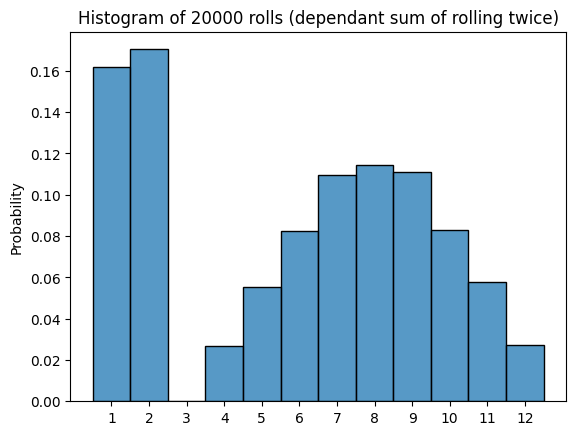

In [25]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls>=3, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

Ex 9: n-sided fair dice

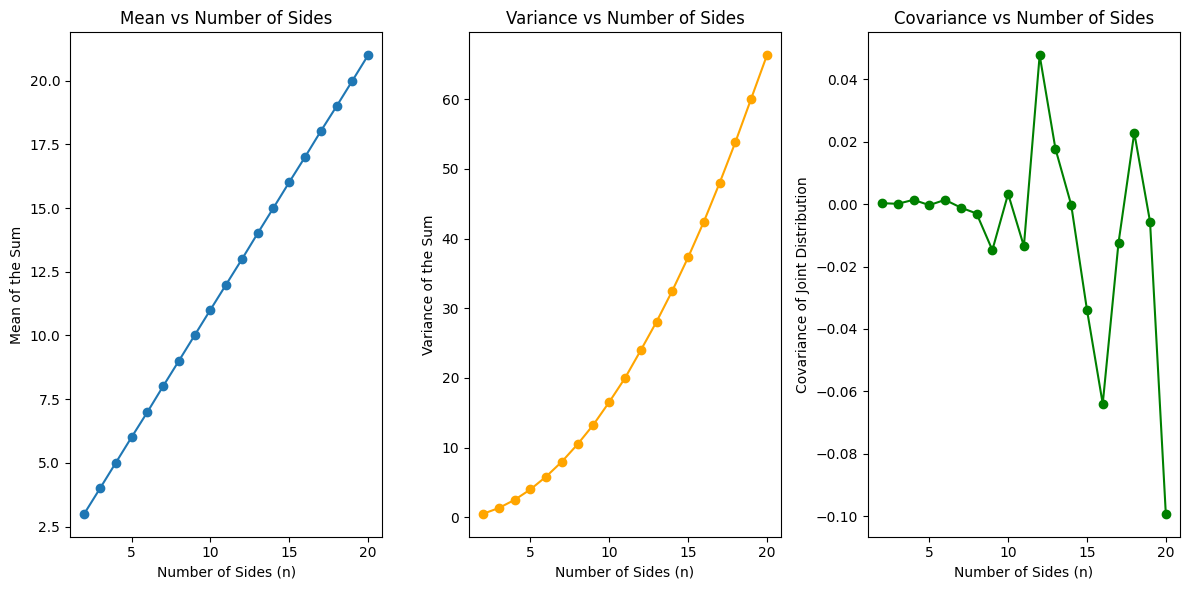

In [29]:
def simulate_dice_throws(n, num_simulations):
    throws = np.random.randint(1, n+1, (num_simulations, 2))
    sums = np.sum(throws, axis=1)
    mean_sum = np.mean(sums)
    variance_sum = np.var(sums)
    covariance_joint = np.cov(throws, rowvar=False)[0, 1]
    return mean_sum, variance_sum, covariance_joint

def analyze_dice_sides(n_values, num_simulations=100000):
    means = []
    variances = []
    covariances = []

    for n in n_values:
        mean_sum, variance_sum, covariance_joint = simulate_dice_throws(n, num_simulations)
        means.append(mean_sum)
        variances.append(variance_sum)
        covariances.append(covariance_joint)

    return means, variances, covariances

n_values = range(2, 21)
num_simulations = 300000 #Adjust this value to your liking

means, variances, covariances = analyze_dice_sides(n_values, num_simulations)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(n_values, means, marker='o')
plt.xlabel('Number of Sides (n)')
plt.ylabel('Mean of the Sum')
plt.title('Mean vs Number of Sides')

plt.subplot(1, 3, 2)
plt.plot(n_values, variances, marker='o', color='orange')
plt.xlabel('Number of Sides (n)')
plt.ylabel('Variance of the Sum')
plt.title('Variance vs Number of Sides')

plt.subplot(1, 3, 3)
plt.plot(n_values, covariances, marker='o', color='green')
plt.xlabel('Number of Sides (n)')
plt.ylabel('Covariance of Joint Distribution')
plt.title('Covariance vs Number of Sides')

plt.tight_layout()
plt.show()